# Intro
This notebook is an interactive version of the `Fit_componentwise.py` script. Since the script bears many comments on the workflow, they will largely be dismissed in this notebook.

In [1]:
import sys
from threeML import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import time
%matplotlib inline
plt.rcParams.update({'font.size':14, 'figure.figsize':(12, 7)})

20:21:44 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=584507;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=386888;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=931619;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=247248;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=763158;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=633710;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=919172;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=597400;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=991983;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=773106;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=93368;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=858336;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=84847;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=116145;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=164994;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=896768;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=945883;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=373348;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

# A0620 section

In [3]:
pa = '/home/yahecker/Obs_Data/A0620/'
data_path = pa + 'flux_%s_fit.txt'%'g_red'
gdata = XYLike.from_text_file("gdata", data_path)
gdata.assign_to_source(source_name = 'gband_source')

data_path = pa +'flux_%s_fit.txt'%'r_red'
rdata = XYLike.from_text_file("rdata", data_path)
rdata.assign_to_source(source_name = 'rband_source')

data_path = pa +'flux_%s_fit.txt'%'i_red'
idata = XYLike.from_text_file("idata", data_path)
idata.assign_to_source(source_name = 'iband_source')

data_path = pa +'flux_%s_fit.txt'%'z_red'
zdata = XYLike.from_text_file("zdata", data_path)
zdata.assign_to_source(source_name = 'zband_source')

data_path = pa +'flux_%s_fit.txt'%'J_red'
Jdata = XYLike.from_text_file("Jdata", data_path)
Jdata.assign_to_source(source_name = 'Jband_source')

data_path = pa +'flux_%s_fit.txt'%'H_red'
Hdata = XYLike.from_text_file("Hdata", data_path)
Hdata.assign_to_source(source_name = 'Hband_source')

data_path = pa +'flux_%s_fit.txt'%'K_red'
Kdata = XYLike.from_text_file("Kdata", data_path)
Kdata.assign_to_source(source_name = 'Kband_source')

data = DataList(gdata, rdata, idata, zdata, Jdata, Hdata, Kdata)

In [2]:
extinction_factors = {'g':1.282,
                      'r':0.897,
                      'i':0.641,
                      'z':0.513,
                      'J':0.385,
                      'H':0.256,
                      'K':0.128
                     }

In [5]:
def ModeltoPointSource(band):
    star = TemplateModel('A06_f_noHS_star_%s'%band, log_interp = False)
    star.K.fix = False
    star.scale.fix = True
    
    disc = TemplateModel('A06_f_noHS_disc_%s'%band, log_interp = False)
    disc.K.fix = False
    disc.scale.fix = True
    
    print(f'Loaded {band} model.')
    
    return PointSource('%s_source'%band, 0, 0, components=[SpectralComponent('Star', star), SpectralComponent('Disc', disc)])


filter_list = ['gband', 'rband', 'iband', 'zband', 'Jband', 'Hband', 'Kband']
point_source_list = ['ps_g', 'ps_r', 'ps_i', 'ps_z', 'ps_J', 'ps_H', 'ps_K']
PointSdict = {}
for h in range(len(filter_list)):
    PointSdict[point_source_list[h]] = ModeltoPointSource(filter_list[h])

my_model = Model(PointSdict['ps_g'], PointSdict['ps_r'],
                 PointSdict['ps_i'], PointSdict['ps_z'],
                 PointSdict['ps_J'], PointSdict['ps_H'], PointSdict['ps_K'])

Loaded gband model.
Loaded rband model.
Loaded iband model.
Loaded zband model.
Loaded Jband model.
Loaded Hband model.
Loaded Kband model.


In [3]:
parameter_Extinction = Parameter(name='A_V',
                                 value=0.5,
                                 min_value=0,
                                 max_value=5,
                                 # free=True,
                                 free=False,
                                 unit='',
                                 delta=0.05)

my_model.add_external_parameter(parameter_Extinction)

NameError: name 'my_model' is not defined

The extinction is parameterized via \$A_V=R_V\cdot E(B-V)\$ with \$R_V=3.1\$. In flux units, this corresponds to a factor of \$10^{-0.4\cdot k_{band} \cdot A_V}\$.

In [2]:
class FilterbandExtinctionFunction(Function1D, metaclass=FunctionMeta):
    r"""
    description :
        A function for calculating the extinction over a band with a pivot band
    latex : $ F_\lambda = K \cdot 10^{-0.4 \cdot k_{band} \cdot A_V} $
    parameters :
        K :
            desc : Normalization (differential flux without extinction)
            initial value : 1.0
            is_normalization : True
            fix : True
            min : 1e-30
            max : 1e3
            delta : 0.1
        k_band :
            desc : band dependent ratio of extinction in this band relative to Johnson V band ( $ A_\lambda/A_V $ )
            initial value : 1.0
            fix : yes
            min : -2
            max : 5
    """
    
    def _set_units(self, x_unit, y_unit):
        # The extinction constants are all dimensionless
        self.k_band.unit = u.dimensionless_unscaled

        # The normalization has the same units as the flux

        self.K.unit = y_unit


    def evaluate(self, x, K, k_band):

        return K * np.power(10, -0.4 * k_band * x)

Link the Normalization to the A_V with the corresponding factor formula. As the XRbinary output is normalized to the \$g\$ band, all bands have to be rebrightened by the amount that the \$g\$ band got dimmed. Hence, the band factors are reduced by the \$g\$ band factors.

In [8]:
my_model.link(my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['g'] - extinction_factors['g']))
my_model.link(my_model.rband_source.spectrum.Star.A06_f_noHS_star_rband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['r'] - extinction_factors['g']))
my_model.link(my_model.iband_source.spectrum.Star.A06_f_noHS_star_iband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['i'] - extinction_factors['g']))
my_model.link(my_model.zband_source.spectrum.Star.A06_f_noHS_star_zband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['z'] - extinction_factors['g']))
my_model.link(my_model.Jband_source.spectrum.Star.A06_f_noHS_star_Jband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['J'] - extinction_factors['g']))
my_model.link(my_model.Hband_source.spectrum.Star.A06_f_noHS_star_Hband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['H'] - extinction_factors['g']))
my_model.link(my_model.Kband_source.spectrum.Star.A06_f_noHS_star_Kband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['K'] - extinction_factors['g']))

my_model.link(my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['g'] - extinction_factors['g']))
my_model.link(my_model.rband_source.spectrum.Disc.A06_f_noHS_disc_rband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['r'] - extinction_factors['g']))
my_model.link(my_model.iband_source.spectrum.Disc.A06_f_noHS_disc_iband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['i'] - extinction_factors['g']))
my_model.link(my_model.zband_source.spectrum.Disc.A06_f_noHS_disc_zband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['z'] - extinction_factors['g']))
my_model.link(my_model.Jband_source.spectrum.Disc.A06_f_noHS_disc_Jband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['J'] - extinction_factors['g']))
my_model.link(my_model.Hband_source.spectrum.Disc.A06_f_noHS_disc_Hband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['H'] - extinction_factors['g']))
my_model.link(my_model.Kband_source.spectrum.Disc.A06_f_noHS_disc_Kband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['K'] - extinction_factors['g']))

### g norm

In [9]:
allInklParams =[my_model.rband_source.spectrum.Star.A06_f_noHS_star_rband.Inkl,
                my_model.iband_source.spectrum.Star.A06_f_noHS_star_iband.Inkl,
                my_model.zband_source.spectrum.Star.A06_f_noHS_star_zband.Inkl,
                my_model.Jband_source.spectrum.Star.A06_f_noHS_star_Jband.Inkl,
                my_model.Hband_source.spectrum.Star.A06_f_noHS_star_Hband.Inkl,
                my_model.Kband_source.spectrum.Star.A06_f_noHS_star_Kband.Inkl,
                my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.Inkl,
                my_model.rband_source.spectrum.Disc.A06_f_noHS_disc_rband.Inkl,
                my_model.iband_source.spectrum.Disc.A06_f_noHS_disc_iband.Inkl,
                my_model.zband_source.spectrum.Disc.A06_f_noHS_disc_zband.Inkl,
                my_model.Jband_source.spectrum.Disc.A06_f_noHS_disc_Jband.Inkl,
                my_model.Hband_source.spectrum.Disc.A06_f_noHS_disc_Hband.Inkl,
                my_model.Kband_source.spectrum.Disc.A06_f_noHS_disc_Kband.Inkl]

allT_SecParams = [my_model.rband_source.spectrum.Star.A06_f_noHS_star_rband.T_Sec,
                  my_model.iband_source.spectrum.Star.A06_f_noHS_star_iband.T_Sec,
                  my_model.zband_source.spectrum.Star.A06_f_noHS_star_zband.T_Sec,
                  my_model.Jband_source.spectrum.Star.A06_f_noHS_star_Jband.T_Sec,
                  my_model.Hband_source.spectrum.Star.A06_f_noHS_star_Hband.T_Sec,
                  my_model.Kband_source.spectrum.Star.A06_f_noHS_star_Kband.T_Sec,
                  my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Sec,
                  my_model.rband_source.spectrum.Disc.A06_f_noHS_disc_rband.T_Sec,
                  my_model.iband_source.spectrum.Disc.A06_f_noHS_disc_iband.T_Sec,
                  my_model.zband_source.spectrum.Disc.A06_f_noHS_disc_zband.T_Sec,
                  my_model.Jband_source.spectrum.Disc.A06_f_noHS_disc_Jband.T_Sec,
                  my_model.Hband_source.spectrum.Disc.A06_f_noHS_disc_Hband.T_Sec,
                  my_model.Kband_source.spectrum.Disc.A06_f_noHS_disc_Kband.T_Sec]

allT_DiscParams = [my_model.rband_source.spectrum.Star.A06_f_noHS_star_rband.T_Disc,
                   my_model.iband_source.spectrum.Star.A06_f_noHS_star_iband.T_Disc,
                   my_model.zband_source.spectrum.Star.A06_f_noHS_star_zband.T_Disc,
                   my_model.Jband_source.spectrum.Star.A06_f_noHS_star_Jband.T_Disc,
                   my_model.Hband_source.spectrum.Star.A06_f_noHS_star_Hband.T_Disc,
                   my_model.Kband_source.spectrum.Star.A06_f_noHS_star_Kband.T_Disc,
                   my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Disc,
                   my_model.rband_source.spectrum.Disc.A06_f_noHS_disc_rband.T_Disc,
                   my_model.iband_source.spectrum.Disc.A06_f_noHS_disc_iband.T_Disc,
                   my_model.zband_source.spectrum.Disc.A06_f_noHS_disc_zband.T_Disc,
                   my_model.Jband_source.spectrum.Disc.A06_f_noHS_disc_Jband.T_Disc,
                   my_model.Hband_source.spectrum.Disc.A06_f_noHS_disc_Hband.T_Disc,
                   my_model.Kband_source.spectrum.Disc.A06_f_noHS_disc_Kband.T_Disc]

allf_rParams = [my_model.rband_source.spectrum.Star.A06_f_noHS_star_rband.f_r,
                my_model.iband_source.spectrum.Star.A06_f_noHS_star_iband.f_r,
                my_model.zband_source.spectrum.Star.A06_f_noHS_star_zband.f_r,
                my_model.Jband_source.spectrum.Star.A06_f_noHS_star_Jband.f_r,
                my_model.Hband_source.spectrum.Star.A06_f_noHS_star_Hband.f_r,
                my_model.Kband_source.spectrum.Star.A06_f_noHS_star_Kband.f_r,
                my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.f_r,
                my_model.rband_source.spectrum.Disc.A06_f_noHS_disc_rband.f_r,
                my_model.iband_source.spectrum.Disc.A06_f_noHS_disc_iband.f_r,
                my_model.zband_source.spectrum.Disc.A06_f_noHS_disc_zband.f_r,
                my_model.Jband_source.spectrum.Disc.A06_f_noHS_disc_Jband.f_r,
                my_model.Hband_source.spectrum.Disc.A06_f_noHS_disc_Hband.f_r,
                my_model.Kband_source.spectrum.Disc.A06_f_noHS_disc_Kband.f_r]

allRinnerParams = [my_model.rband_source.spectrum.Star.A06_f_noHS_star_rband.R_in,
                   my_model.iband_source.spectrum.Star.A06_f_noHS_star_iband.R_in,
                   my_model.zband_source.spectrum.Star.A06_f_noHS_star_zband.R_in,
                   my_model.Jband_source.spectrum.Star.A06_f_noHS_star_Jband.R_in,
                   my_model.Hband_source.spectrum.Star.A06_f_noHS_star_Hband.R_in,
                   my_model.Kband_source.spectrum.Star.A06_f_noHS_star_Kband.R_in,
                   my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.R_in,
                   my_model.rband_source.spectrum.Disc.A06_f_noHS_disc_rband.R_in,
                   my_model.iband_source.spectrum.Disc.A06_f_noHS_disc_iband.R_in,
                   my_model.zband_source.spectrum.Disc.A06_f_noHS_disc_zband.R_in,
                   my_model.Jband_source.spectrum.Disc.A06_f_noHS_disc_Jband.R_in,
                   my_model.Hband_source.spectrum.Disc.A06_f_noHS_disc_Hband.R_in,
                   my_model.Kband_source.spectrum.Disc.A06_f_noHS_disc_Kband.R_in]

my_model.link(allInklParams, my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl)
my_model.link(allT_SecParams, my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec)
my_model.link(allT_DiscParams, my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc)
my_model.link(allRinnerParams, my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in)
my_model.link(allf_rParams, my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r)

In [9]:
my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl.prior = Truncated_gaussian(mu = 58,
                                                                                     sigma = 15,
                                                                                     lower_bound = 46,
                                                                                     upper_bound=74)

my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec.prior = Truncated_gaussian(mu = 4500,
                                                                                      sigma=800,
                                                                                      lower_bound = 3750,
                                                                                      upper_bound = 5250)

my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc.prior = Truncated_gaussian(mu = 2750,
                                                                                      sigma=1000,
                                                                                      lower_bound = 1000,
                                                                                      upper_bound = 4500)

my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r.prior = Truncated_gaussian(mu = 0.3,
                                                                                      sigma = 0.6,
                                                                                      lower_bound = 0.0,
                                                                                      upper_bound = 1.0)

my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in.prior = Truncated_gaussian(mu = 6000,
                                                                                        sigma=4000,
                                                                                        lower_bound = 1000,
                                                                                        upper_bound = 10000)

In [10]:
my_model.display()

Model summary:
==============

                  N
Point sources     7
Extended sources  0
Particle sources  0

Free parameters (6):
--------------------

                        value min_value max_value unit
gband_source...Inkl      60.0      46.0      74.0     
gband_source...T_Sec   4500.0    3750.0    5250.0     
gband_source...T_Disc  3250.0    2000.0    4500.0     
gband_source...f_r        0.5       0.0       1.0     
gband_source...R_in    5500.0    1000.0   10000.0     
A_V                       0.5       0.0       5.0     

Fixed parameters (66):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (79):
----------------------

              gband_source.spectrum.Star.A06_f_noHS_star_gband.K
current value                                                1.0
function                            FilterbandExtinctionFunction
linked to                                                    A_V
unit                                             1 / (cm2 keV s)

              gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Disc
current value                                             3250.0     
function                                                    Line     
linked to      gband_source.spectrum.Disc.A06_f_noHS_disc_gba...     
unit                                                                 

              gband_source.spectrum.Star.A06_f_noHS_star_gband.f_r
current value                                                0.5  
function                                                    Line  
linked to      gband_source.spectrum.Disc.A06_f_noHS_disc_gba...  
unit                                                              

              gband_source.spectrum.Star.A06_f_noHS_star_gband.R_in
current value                                             5500.0   
function                                                    Line   
linked to      gband_source.spectrum.Disc.A06_f_noHS_disc_gba...   
unit                                                               

              gband_source.spectrum.Disc.A06_f_noHS_disc_gband.K
current value                                                1.0
function                            FilterbandExtinctionFunction
linked to                                                    A_V
unit                                             1 / (cm2 keV s)

              gband_source.spectrum.Disc.A06_f_noHS_disc_gband.Inkl
current value                                               60.0   
function                                                    Line   
linked to      gband_source.spectrum.Star.A06_f_noHS_star_gba...   
unit                                                               

              gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Sec
current value                                             4500.0    
function                                                    Line    
linked to      gband_source.spectrum.Star.A06_f_noHS_star_gba...    
unit                                                                

              rband_source.spectrum.Star.A06_f_noHS_star_rband.K
current value                                           1.193988
function                            FilterbandExtinctionFunction
linked to                                                    A_V
unit                                             1 / (cm2 keV s)

              rband_source.spectrum.Star.A06_f_noHS_star_rband.Inkl
current value                                               60.0   
function                                                    Line   
linked to      gband_source.spectrum.Star.A06_f_noHS_star_gba...   
unit                                                               

              rband_source.spectrum.Star.A06_f_noHS_star_rband.T_Sec
current value                                             4500.0    
function                                                    Line    
linked to      gband_source.spectrum.Sta

Check all free parameters.

In [13]:
for name, _ in my_model.free_parameters.items():
    print(name)

gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in
A_V


To check whether it actually worked, let's plot some of the light curves for a given set of parameters and different \$A_V\$.

In [11]:
my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl.value = 68
my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec.value = 4000
my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc.value = 2500
my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r.value = 0.2
my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in.value = 8000
my_model.A_V = 0.4

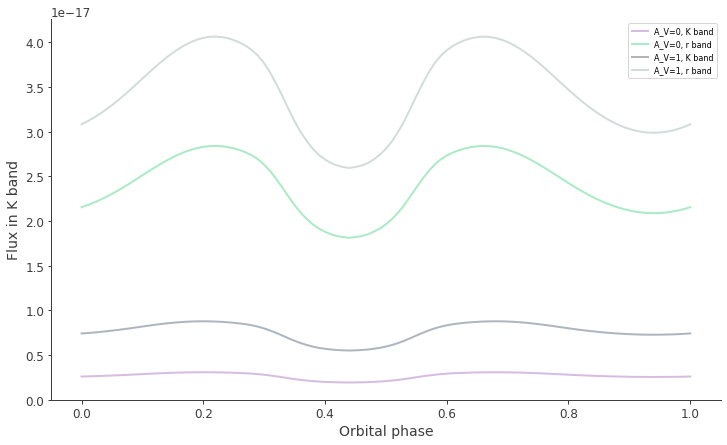

In [15]:
plt.figure(figsize=(12, 7))
av_test_values = [0, 1]
phases = np.linspace(0, 1, 101)

for i, av in enumerate(av_test_values):
    my_model.A_V = av
    plt.plot(phases, my_model.Kband_source.spectrum.Star.shape(phases), alpha=0.4,  label=f'A_V={av}, K band')
    plt.plot(phases, my_model.rband_source.spectrum.Star.shape(phases), alpha=0.4,  label=f'A_V={av}, r band')
plt.xlabel('Orbital phase')
plt.ylabel('Flux in K band')
plt.legend()

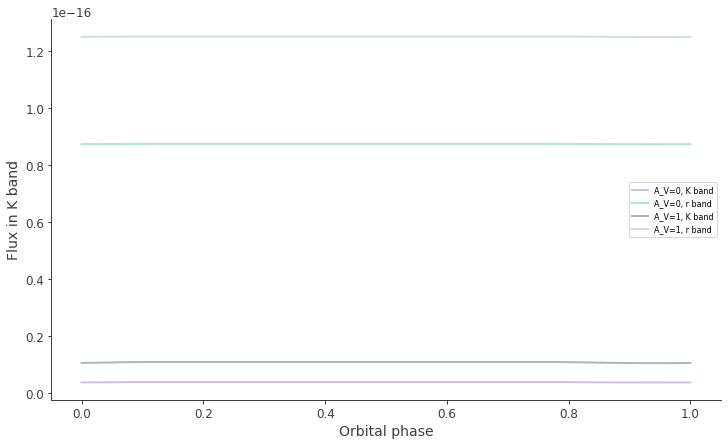

In [16]:
plt.figure(figsize=(12, 7))
av_test_values = [0, 1]
phases = np.linspace(0, 1, 101)

for i, av in enumerate(av_test_values):
    my_model.A_V = av
    plt.plot(phases, my_model.Kband_source.spectrum.Disc.shape(phases), alpha=0.4,  label=f'A_V={av}, K band')
    plt.plot(phases, my_model.rband_source.spectrum.Disc.shape(phases), alpha=0.4,  label=f'A_V={av}, r band')
plt.xlabel('Orbital phase')
plt.ylabel('Flux in K band')
plt.legend()

In case you wish to test your fitting setup (i.e. model and sampler), you can create synthetic data and fit it. Ideally, you can recover your true values, but this goes beyond the scope of this script. (Also, look up simulation-based calibration for a more robust testing strategy than simply recovering a few sets of parameters.)

In [23]:
gdata.set_model(my_model)
gsyn = gdata.get_simulated_dataset()
gsyn.assign_to_source(source_name = 'gband_source')

rdata.set_model(my_model)
rsyn = rdata.get_simulated_dataset()
rsyn.assign_to_source(source_name = 'rband_source')

idata.set_model(my_model)
isyn = idata.get_simulated_dataset()
isyn.assign_to_source(source_name = 'iband_source')

zdata.set_model(my_model)
zsyn = zdata.get_simulated_dataset()
zsyn.assign_to_source(source_name = 'zband_source')

Jdata.set_model(my_model)
Jsyn = Jdata.get_simulated_dataset()
Jsyn.assign_to_source(source_name = 'Jband_source')

Hdata.set_model(my_model)
Hsyn = Hdata.get_simulated_dataset()
Hsyn.assign_to_source(source_name = 'Hband_source')

Kdata.set_model(my_model)
Ksyn = Kdata.get_simulated_dataset()
Ksyn.assign_to_source(source_name = 'Kband_source')

In [24]:
syn_data = DataList(gsyn, rsyn, isyn, zsyn, Jsyn, Hsyn, Ksyn)

In [12]:
%%time

this_AV = 0.9

my_model.A_V = this_AV

with use_astromodels_memoization(False):
    
    bs = BayesianAnalysis(my_model, data)
    
    bs.set_sampler('emcee')
    bs.sampler.setup(n_iterations=500, n_burn_in=6000, n_walkers=400)

    bs.sample()
    
    bs.results.write_to(f'Fitting_Results/A06_f_noHS_3comp_{int(this_AV*10):02d}.fits', overwrite=True)

12:49:11 INFO      sampler set to emcee                                                    ]8;id=177162;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=66737;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/threeML/bayesian/bayesian_analysis.py#233\233]8;;\

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

16:05:01 INFO      Mean acceptance fraction: 0.13093                                           ]8;id=180087;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=441163;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/threeML/bayesian/emcee_sampler.py#157\157]8;;\

Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
gband_source...Inkl,(6.79 -0.31 +0.29) x 10,
gband_source...T_Sec,(4.143 -0.035 +0.04) x 10^3,
gband_source...T_Disc,(3.0 -0.4 +0.6) x 10^3,
gband_source...f_r,(2.5 -0.9 +0.4) x 10^-1,
gband_source...R_in,(6.3 -1.7 +1.8) x 10^3,



Values of -log(posterior) at the minimum:



,-log(posterior)
Hdata,-28.943111
Jdata,-32.783470
Kdata,-32.906021
gdata,-38.857876
idata,-52.434723
rdata,-32.234545
total,-263.497351
zdata,-45.337606



Values of statistical measures:



,statistical measures
AIC,537.784177
BIC,549.028299
DIC,-3364.065196
PDIC,-3570.336417


CPU times: user 3h 16min 44s, sys: 1min 43s, total: 3h 18min 27s
Wall time: 3h 16min 38s


In [3]:
ba = load_analysis_results('Fitting_Results/A06_f_noHS_3comp.fits')

In [11]:
ba.get_data_frame('hpd')

,value,negative_error,positive_error,error,unit
gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl,67.457608,-3.636874,3.847943,3.742408,
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec,3943.448013,-26.879727,39.474899,33.177313,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc,1947.631802,-611.468858,527.130582,569.299720,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r,0.247765,-0.092968,0.089086,0.091027,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in,5729.227578,-2722.036438,1282.886569,2002.461503,
A_V,0.311615,-0.086616,0.102577,0.094597,


20:21:02 INFO      Stepsize for sliding window is 441                                      ]8;id=438148;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=482457;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/threeML/analysis_results.py#1485\1485]8;;\

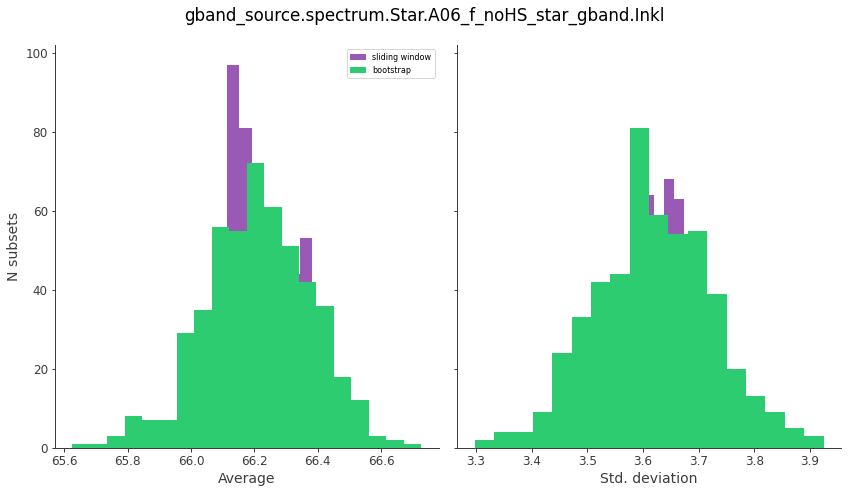

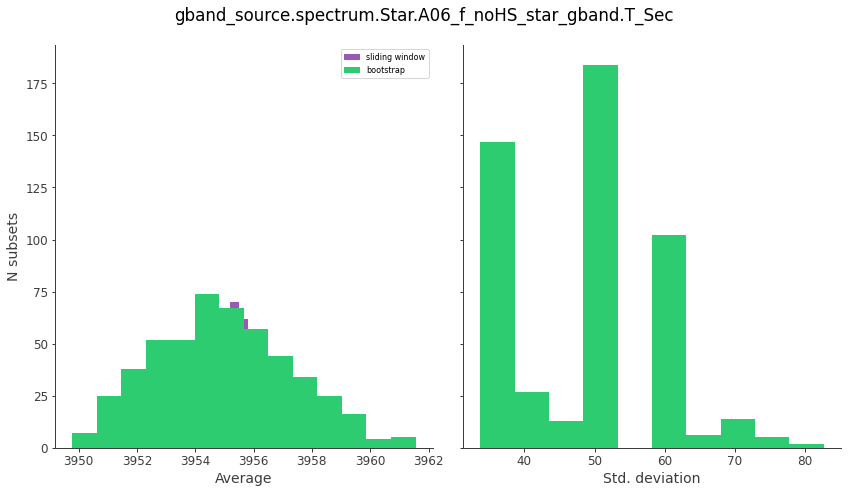

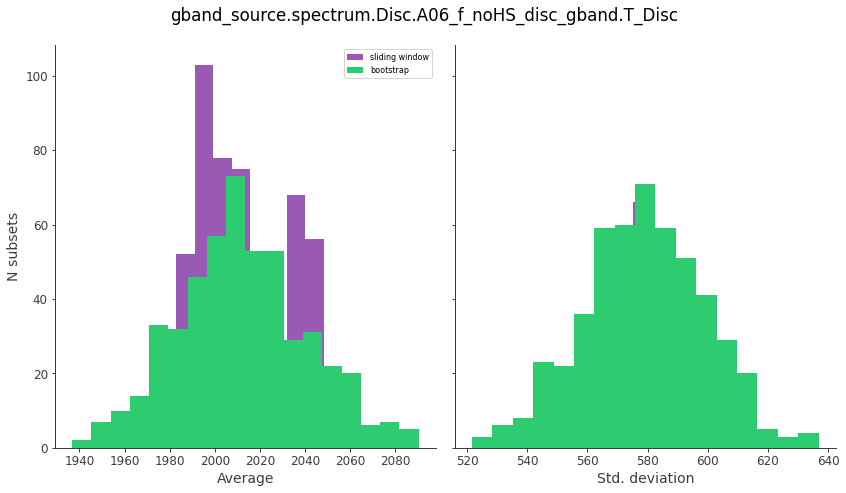

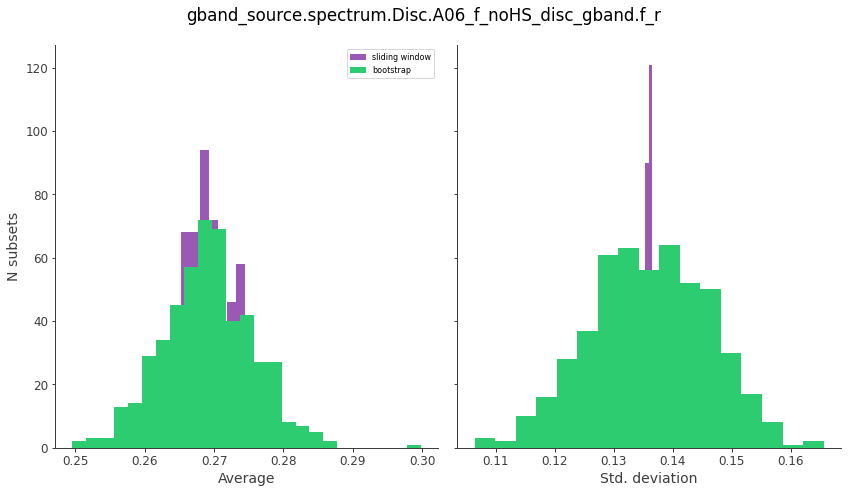

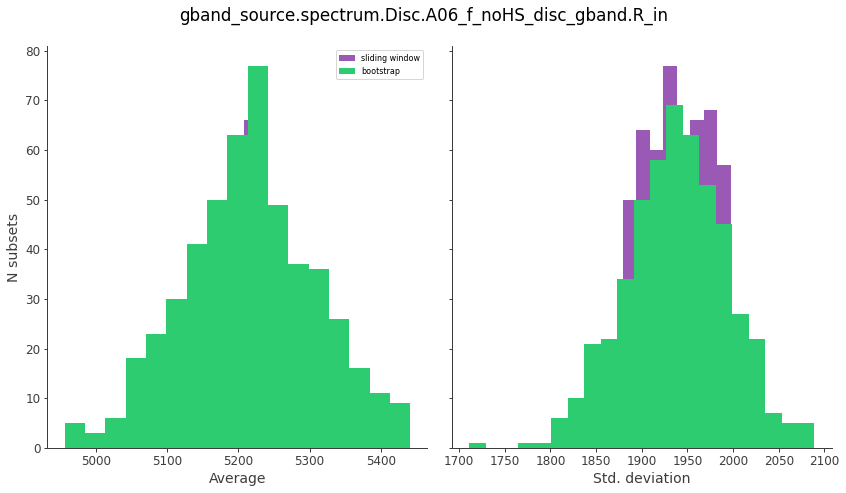

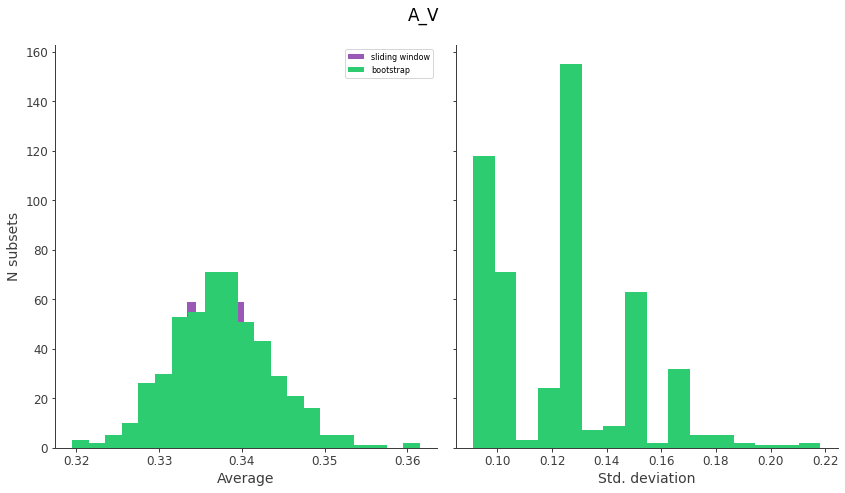

In [12]:
ba.convergence_plots(441, 500)
plt.show()

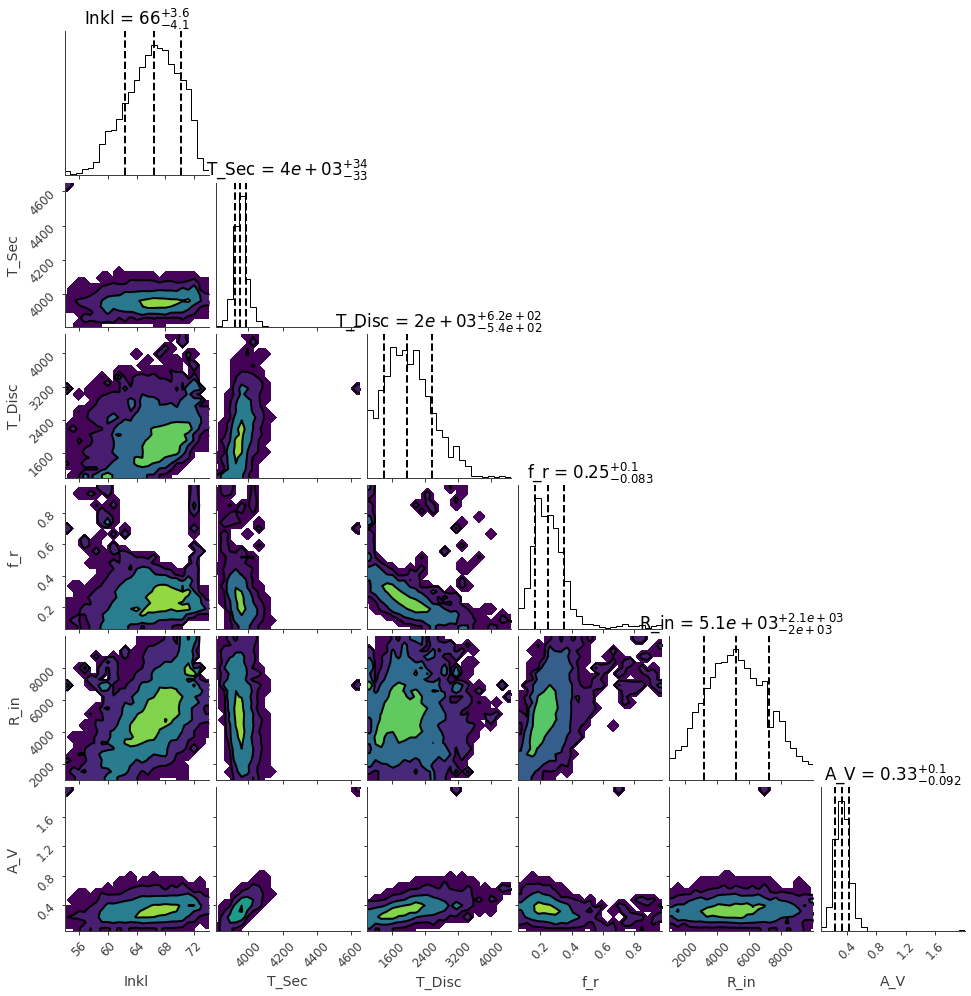

In [13]:
ba.corner_plot()
plt.show()


WARNING MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()



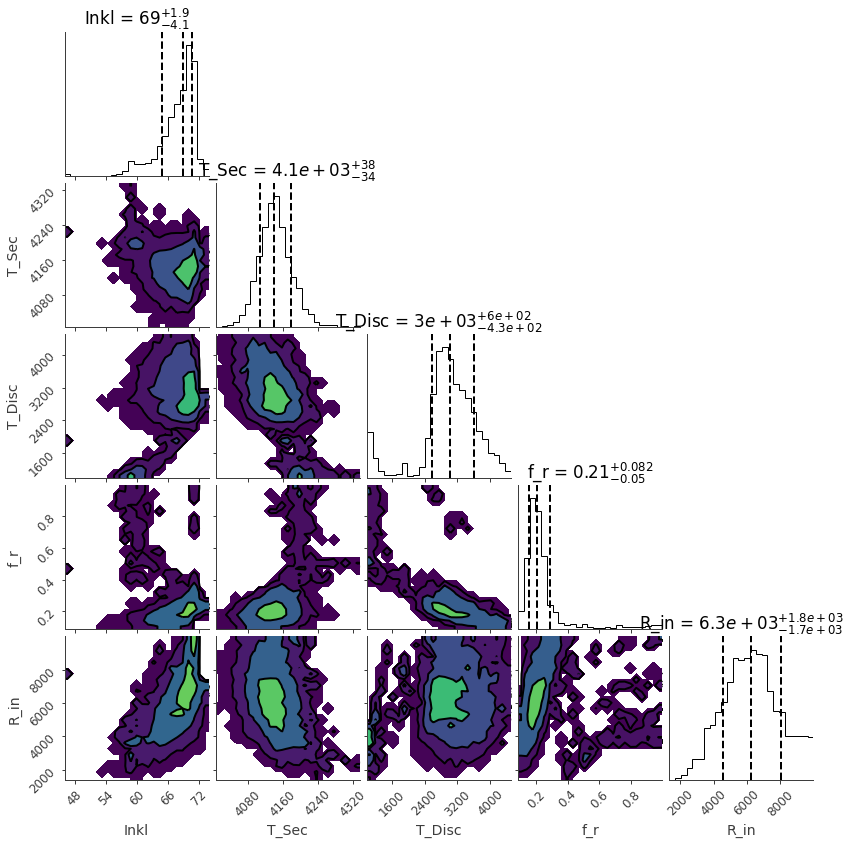

In [13]:
bs.results.corner_plot()
plt.savefig(f'plots/A06_AV_f_noHS_3comp_cp_{int(this_AV*10):02d}.pdf', format='pdf')
plt.show()

In [14]:
### A_V = 0.9
bs.results.get_data_frame()

,value,negative_error,positive_error,error,unit
gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl,67.918835,-3.072954,2.853478,2.963216,
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec,4143.115873,-35.484906,35.657109,35.571007,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc,2990.642113,-407.041435,618.688596,512.865016,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r,0.249041,-0.093245,0.038309,0.065777,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in,6289.923113,-1744.425499,1777.961341,1761.193420,


In [13]:
### A_V = 0.7
bs.results.get_data_frame()

,value,negative_error,positive_error,error,unit
gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl,67.722961,-3.431860,3.136288,3.284074,
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec,4075.251599,-29.176969,28.244771,28.710870,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc,2821.428524,-447.671096,555.521634,501.596365,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r,0.226377,-0.081743,0.041778,0.061761,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in,5834.648730,-1749.411117,1904.170654,1826.790886,


In [16]:
### A_V = 0.5
bs.results.get_data_frame()

,value,negative_error,positive_error,error,unit
gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl,67.045328,-4.037736,3.754766,3.896251,
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec,4002.734855,-31.903812,31.388188,31.646000,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc,2463.369556,-476.252114,573.795648,525.023881,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r,0.244376,-0.103075,0.059594,0.081334,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in,5477.251665,-1911.518122,1932.930580,1922.224351,


In [17]:
### A_V = 0.3
bs.results.get_data_frame()

,value,negative_error,positive_error,error,unit
gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl,65.825060,-3.387231,3.506761,3.446996,
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec,3944.727088,-21.127000,20.640075,20.883537,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc,1862.004139,-407.138041,397.120700,402.129370,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r,0.254060,-0.081829,0.081840,0.081835,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in,4943.396455,-1982.123845,2038.225450,2010.174648,


In [11]:
ba = load_analysis_results('Fitting_Results/A06_f_noHS_3comp.fits')

In [12]:
ba.get_data_frame()

,value,negative_error,positive_error,error,unit
gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl,67.457608,-5.055339,2.663291,3.859315,
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec,3943.448013,-23.709911,43.200734,33.455322,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc,1947.631802,-524.497372,633.113367,578.805370,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r,0.247765,-0.083754,0.103818,0.093786,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in,5729.227578,-2550.540929,1527.748153,2039.144541,
A_V,0.311615,-0.073850,0.117611,0.095731,


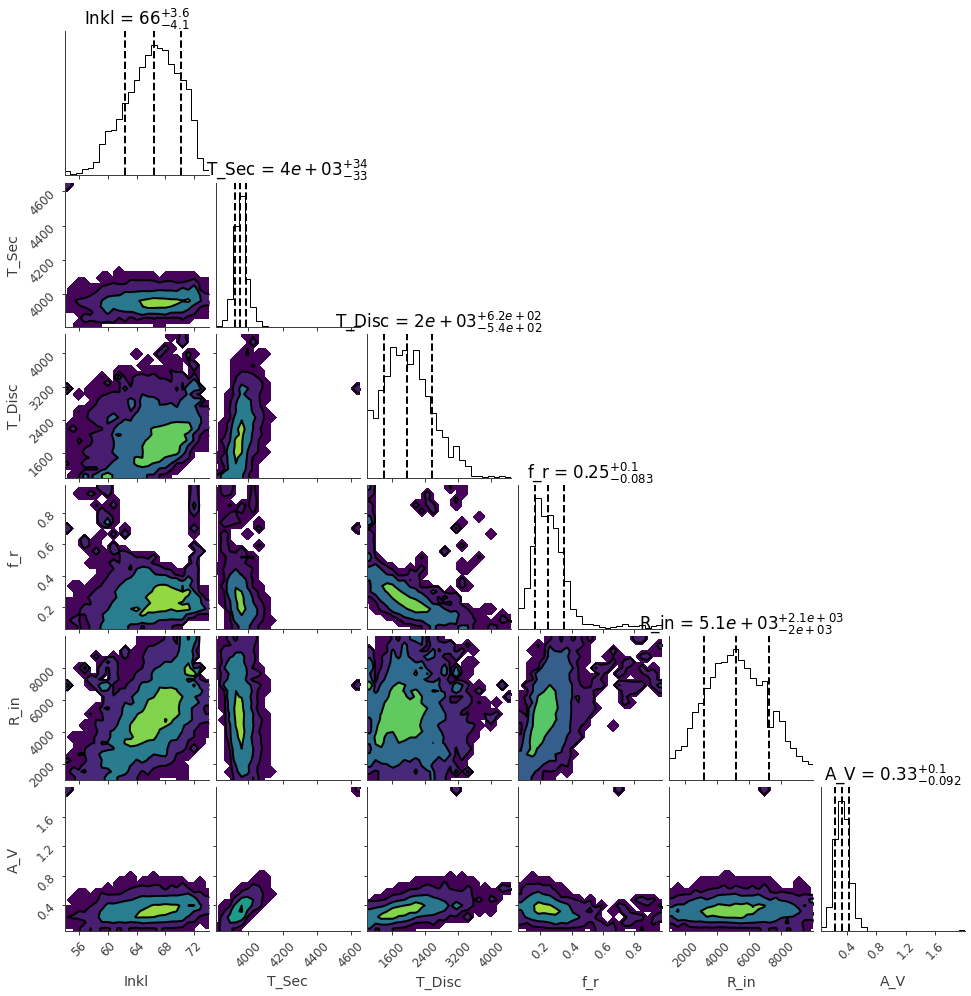

In [12]:
ba.corner_plot()
plt.savefig('plots/A06_AV_f_noHS_3comp_cp.pdf', format='pdf')
plt.show()

In [13]:
print(bs.results.get_data_frame().swapaxes(0, 1).to_latex())

\begin{tabular}{lllllll}
\toprule
{} & gband\_source.spectrum.Star.A06\_f\_noHS\_star\_gband.Inkl & gband\_source.spectrum.Star.A06\_f\_noHS\_star\_gband.T\_Sec & gband\_source.spectrum.Disc.A06\_f\_noHS\_disc\_gband.T\_Disc & gband\_source.spectrum.Disc.A06\_f\_noHS\_disc\_gband.f\_r & gband\_source.spectrum.Disc.A06\_f\_noHS\_disc\_gband.R\_in &       A\_V \\
\midrule
value          &                                          66.187964 &                                        3954.659011 &                                         2022.12319 &                                           0.281488 &                                        5280.443869 &  0.332153 \\
negative\_error &                                          -4.212259 &                                         -35.907429 &                                        -646.354105 &                                          -0.118688 &                                       -2063.326585 & -0.099189 \\
positive\_error &                   

In [15]:
print(bs.results.get_data_frame().to_latex())

\begin{tabular}{lrrrrl}
\toprule
{} &        value &  negative\_error &  positive\_error &        error & unit \\
\midrule
gband\_source.spectrum.Star.A06\_f\_noHS\_star\_gban... &    66.342719 &       -4.005894 &        4.272968 &     4.139431 &      \\
gband\_source.spectrum.Star.A06\_f\_noHS\_star\_gban... &  3953.036294 &      -36.279717 &       32.676925 &    34.478321 &      \\
gband\_source.spectrum.Disc.A06\_f\_noHS\_disc\_gban... &  2001.028329 &     -659.642495 &      662.631485 &   661.136990 &      \\
gband\_source.spectrum.Disc.A06\_f\_noHS\_disc\_gban... &     0.287451 &       -0.122789 &        0.090341 &     0.106565 &      \\
gband\_source.spectrum.Disc.A06\_f\_noHS\_disc\_gban... &  5393.614702 &    -2191.074262 &     2253.861820 &  2222.468041 &      \\
A\_V                                                &     0.327314 &       -0.098906 &        0.092794 &     0.095850 &      \\
\bottomrule
\end{tabular}

